<a href="https://colab.research.google.com/github/Kar3nOrtega/KarenOrtega/blob/main/Semana3/TlleSem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS PREDICTIVOS PARA SISTEMAS INTELIGENTES

## Taller Bosques Aleatorios

Usando el dataset heart.csv desarrollar un sistema de predicción que permita determinar si un paciente tiene una enfermedad cardíaca.

El data set tiene las siguientes variables independientes:

* age (edad)
* sex (sexo)
* chest pain type (tipo de dolor en el pecho)
* resting blood pressure (presión arterial en reposo)
* serum cholestoral in mg/dl (colesterol)
* fasting blood sugar > 120 mg/dl (nivel de azucar en sangre en ayunas)
* resting electrocardiographic results (values 0,1,2) (electrocardiograma en reposo)
* maximum heart rate achieved (frecuencia cardíaca máxima)
* exercise induced angina (angina provocada por ejercicio)
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment (depresión del ST inducida por el ejercicio respecto al reposo)
* number of major vessels (0-3) colored by flourosopy (número de vasos principales coloreados)
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect (talasemia detectada)

La variable dependiente o target es:

* Enfermedad cardíaca (valor = 0 NO, valor = 1 SI)

Realizar el ajuste del modelo, usando el 80% de los datos en el entrenamiento y el 20% para test, además obtener el accuracy general del sistema de predicción.

Guarde el modelo con extensión .h5

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
dfdata = pd.read_csv("heart.csv")

In [4]:
dfdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
dfdata.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
dfdata.count()

,0
age,1025
sex,1025
cp,1025
trestbps,1025
chol,1025
fbs,1025
restecg,1025
thalach,1025
exang,1025
oldpeak,1025


In [7]:
dfdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dfdata.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
dfdata.target.unique()

array([0, 1])

In [12]:
labels = ['enfermo','sano']

labels

['enfermo', 'sano']

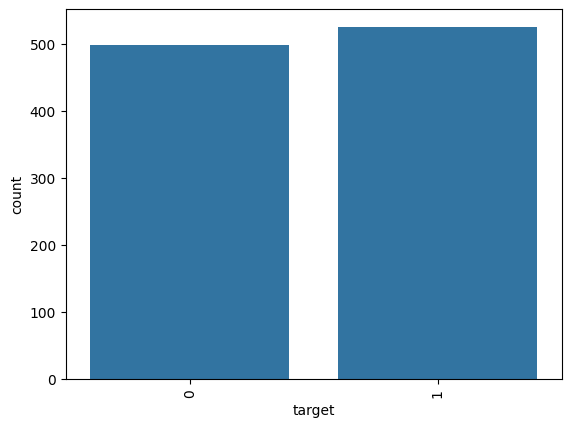

In [13]:
sns.countplot(x='target',data=dfdata)
plt.xticks(x=dfdata['target'],rotation='vertical')
plt.show()

In [15]:
dfdata[dfdata['target']==2].count()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [17]:
dfdata.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [19]:
dfdata[dfdata['target']==0].count()


,0
age,499
sex,499
cp,499
trestbps,499
chol,499
fbs,499
restecg,499
thalach,499
exang,499
oldpeak,499


In [21]:
from sklearn.utils import resample

dfdata2 =pd.DataFrame()

for i in range(2):
  df_aux =dfdata[dfdata.target==i]
  df_aux =resample(df_aux, n_samples=499,random_state=2)
  dfdata2 = pd.concat([dfdata2,df_aux])

  dfdata2.target.value_counts()

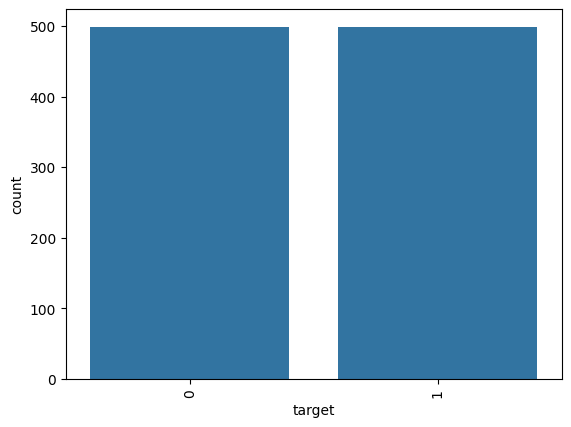

In [22]:
sns.countplot(x='target',data=dfdata2)
plt.xticks(x=dfdata2['target'],rotation='vertical')
plt.show()

In [23]:
dfdata2.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
364,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
27,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0


In [24]:
#definir entradas y salidas
X = dfdata2.drop(['target'], axis =1)
Y = dfdata2['target']

X =np.asarray(X)
Y =np.asarray(Y)

print(X.shape, Y.shape)


(998, 13) (998,)


In [25]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(798, 13) (200, 13) (798,) (200,)


In [27]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.asarray(ytrain).reshape(-1,1))


y_train = enc.transform(np.asarray(ytrain).reshape(-1,1)).toarray()
y_test = enc.transform(np.asarray(ytest).reshape(-1,1)).toarray()

ytrain


array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# capas
model =Sequential()

model.add(Dense(256, input_shape=(xtrain.shape[1],), activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))



#capa de salida

model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,042 (465.01 KB)

 Trainable params: 119,042 (465.01 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

In [32]:
history = model.fit(xtrain, y_train, epochs=10, batch_size=32, verbose=1,validation_split=0.1)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5117 - loss: 3.7223 - val_accuracy: 0.4125 - val_loss: 2.1966
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5761 - loss: 1.4066 - val_accuracy: 0.5750 - val_loss: 0.7589
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5493 - loss: 0.9435 - val_accuracy: 0.6250 - val_loss: 0.6353
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5490 - loss: 0.8443 - val_accuracy: 0.6250 - val_loss: 0.6149
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6116 - loss: 0.7366 - val_accuracy: 0.5750 - val_loss: 0.6634
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6014 - loss: 0.7029 - val_accuracy: 0.6500 - val_loss: 0.6479
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6291 - loss: 0.6632 - val_accuracy: 0.7375 - val_loss: 0.5967
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5461 - loss: 0.6946 - val_accuracy: 0.6500 - val_loss

In [33]:
model.save('Karen3.h5')

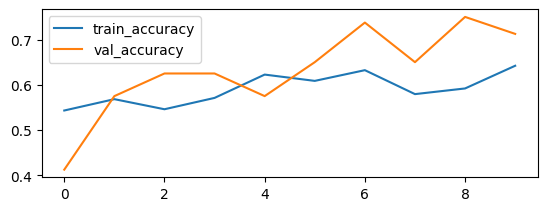

In [34]:


plt.subplot (2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'])


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0
 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0
 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1
 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0
 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
              precision    recall  f1-score   support

           0     0.7048    0.7872    0.7437        94
           1     0.7895    0.7075    0.7463       106

    accuracy                         0.7450       200
   macro avg     0.7471    0.7474    0.7450       200
weighted avg     0.7497    0.7450    0.7451       200



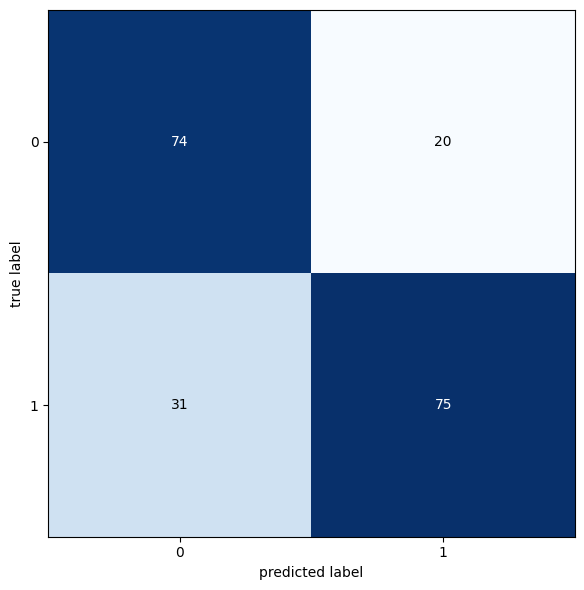

In [35]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

ypred = model.predict(xtest)
print(ytest)
matriz = confusion_matrix(ytest, np.argmax(ypred,axis=1))

plot_confusion_matrix(conf_mat = matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()
print(metrics.classification_report(ytest, np.argmax(ypred, axis=1), digits=4))

In [36]:
print(xtest.shape, ytest.shape, ypred.shape)


(200, 13) (200,) (200, 2)
